# Relative Age Effect in English football

Using a database of over 2,000 players registered as English to establish patterns relating to the date of birth of male players who are eligible to represent England. This will factor in the level of football they are playing at, how many appearances they have made, and how many goals scored. Where possible, it will also look for patterns relating to where the player was born, to establish any sociological factor for success. 

In [71]:
import pandas as pd  
import matplotlib.pyplot as plt

#### English players by current tier

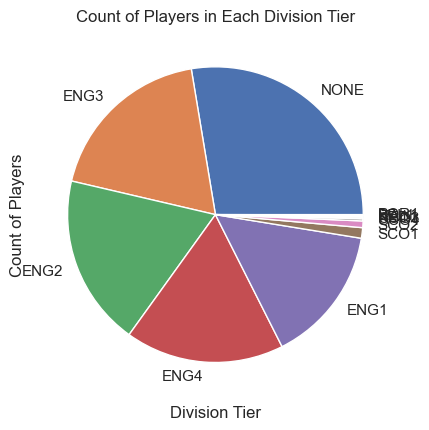

In [72]:
# Load the dataset
df = pd.read_csv('../Datasets/dataset_2016.csv')

# Count the occurrences of each unique Tier
tier_count = df['division_tier'].value_counts()

# Generate the pie chart
tier_count.plot(kind='pie')
plt.title('Count of Players in Each Division Tier')
plt.xlabel('Division Tier')
plt.ylabel('Count of Players')
plt.show()

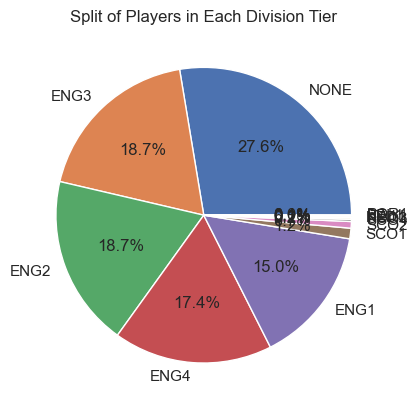

In [73]:
# Count the occurrences of each unique Tier
tier_count = df['division_tier'].value_counts()

# Generate the pie chart
plt.pie(tier_count, labels=tier_count.index, autopct='%1.1f%%')
plt.title('Split of Players in Each Division Tier')
plt.show()


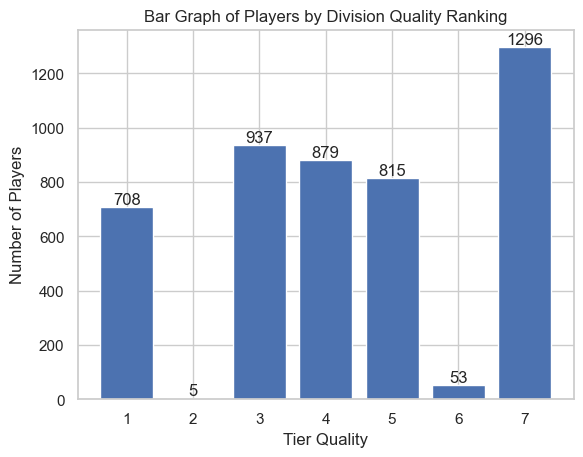

In [74]:
# Count the occurrences of each unique Tier
tier_count = df['tier_quality'].value_counts()

# Generate the bar graph
bars = plt.bar(tier_count.index, tier_count.values)

# Add the count above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.title('Bar Graph of Players by Division Quality Ranking')
plt.xlabel('Tier Quality')
plt.ylabel('Number of Players')
plt.show()


#### Looking at the birthdays

birth_month
10.0    773
9.0     621
11.0    554
3.0     450
1.0     435
12.0    388
2.0     324
4.0     263
7.0     256
5.0     246
6.0     222
8.0     166
Name: count, dtype: int64


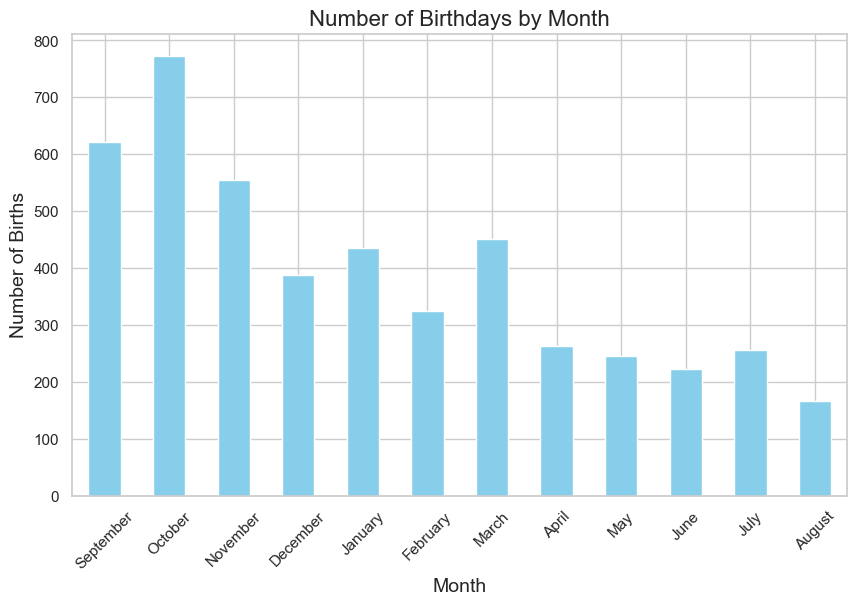

In [75]:
# Convert 'Date of Birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Extract month from 'Date of Birth'
df['birth_month'] = df['date_of_birth'].dt.month

# Get a sorted list of months by most common
sorted_months = df['birth_month'].value_counts().sort_values(ascending=False)

print(sorted_months)

# Reorder the months to start with September
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
sorted_months = sorted_months.reindex(month_order)

# Plot the reordered list of months by most common
plt.figure(figsize=(10, 6))
sorted_months.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Number of Birthdays by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Births', fontsize=14)

# Customize x-axis labels to show month names in the new order
plt.xticks(ticks=range(12), labels=['September', 'October', 'November', 'December', 
                                    'January', 'February', 'March', 'April', 
                                    'May', 'June', 'July', 'August'], rotation=45)

# Display the plot
plt.show()


In [76]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../Datasets/dataset_2016.csv')

# Convert 'date_of_birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Extract month and year from 'date_of_birth'
df['birth_month'] = df['date_of_birth'].dt.month
df['birth_year'] = df['date_of_birth'].dt.year

# Group by 'birth_year' and find the most common month for each year
# common_months_by_year = df.groupby('birth_year')['birth_month'].agg(lambda x: x.value_counts().idxmax())

# Group by 'birth_year' and 'birth_month' and get the count for each group
monthly_counts_by_year = df.groupby(['birth_year', 'birth_month']).size()

# print(common_months_by_year)

pd.set_option('display.max_rows', None)  # This will allow unlimited rows to be displayed.

print(monthly_counts_by_year)


birth_year  birth_month
1969.0      8.0              1
1972.0      4.0              1
1973.0      5.0              1
            7.0             34
1974.0      3.0              1
1975.0      3.0             33
            7.0              1
            8.0              1
1976.0      5.0              1
            9.0              1
1977.0      5.0             32
            6.0              3
            8.0              1
            9.0              1
            10.0             1
            11.0             1
1978.0      3.0             31
            5.0              1
            6.0              1
            9.0              2
            10.0             2
1979.0      3.0             60
            10.0            29
            11.0            32
            12.0             3
1980.0      1.0              1
            3.0             28
            5.0             30
            6.0              1
            10.0             6
            11.0            54
            12.

In [77]:
# Define a custom aggregation function
def common_months(x):
    most_common = x.value_counts().idxmax()
    least_common = x.value_counts().idxmin()
    return most_common, least_common

# Group by 'Birth Year' and apply the custom function
common_least_common_months_by_year = df.groupby('birth_year')['birth_month'].agg(common_months)

print(common_least_common_months_by_year)


birth_year
1969.0      (8.0, 8.0)
1972.0      (4.0, 4.0)
1973.0      (7.0, 5.0)
1974.0      (3.0, 3.0)
1975.0      (3.0, 8.0)
1976.0      (9.0, 9.0)
1977.0     (5.0, 11.0)
1978.0      (3.0, 6.0)
1979.0     (3.0, 12.0)
1980.0     (11.0, 6.0)
1981.0     (11.0, 6.0)
1982.0      (9.0, 1.0)
1983.0      (1.0, 2.0)
1984.0     (9.0, 11.0)
1985.0     (12.0, 8.0)
1986.0    (10.0, 12.0)
1987.0    (10.0, 11.0)
1988.0     (10.0, 5.0)
1989.0      (9.0, 8.0)
1990.0    (12.0, 11.0)
1991.0    (10.0, 11.0)
1992.0     (10.0, 4.0)
1993.0     (10.0, 4.0)
1994.0      (9.0, 5.0)
1995.0     (10.0, 5.0)
1996.0      (1.0, 8.0)
1997.0      (9.0, 4.0)
1998.0      (9.0, 7.0)
1999.0      (1.0, 8.0)
Name: birth_month, dtype: object


In [78]:
# Group by 'Tier Quality' and find the most common birth_month for each tier
common_month_by_tier = df.groupby('tier_quality')['birth_month'].agg(lambda x: x.value_counts().idxmax())

print(common_month_by_tier)


tier_quality
1.0     9.0
2.0     6.0
3.0    10.0
4.0    10.0
5.0    10.0
6.0     3.0
7.0    10.0
Name: birth_month, dtype: float64


In [79]:
# Define a custom aggregation function
def most_common_quarter(x):
    # Find the most common quarter
    most_common = x.value_counts().idxmax()
    return most_common

# Group by 'Birth Year' and apply the custom function
common_most_common_quarter_by_year = df.groupby('birth_year')['birth_quarter'].agg(most_common_quarter)

print(common_most_common_quarter_by_year)


birth_year
1969.0    4.0
1972.0    3.0
1973.0    4.0
1974.0    3.0
1975.0    3.0
1976.0    1.0
1977.0    3.0
1978.0    3.0
1979.0    1.0
1980.0    1.0
1981.0    1.0
1982.0    1.0
1983.0    1.0
1984.0    1.0
1985.0    2.0
1986.0    1.0
1987.0    1.0
1988.0    1.0
1989.0    1.0
1990.0    2.0
1991.0    1.0
1992.0    1.0
1993.0    1.0
1994.0    1.0
1995.0    1.0
1996.0    2.0
1997.0    1.0
1998.0    1.0
1999.0    2.0
Name: birth_quarter, dtype: float64


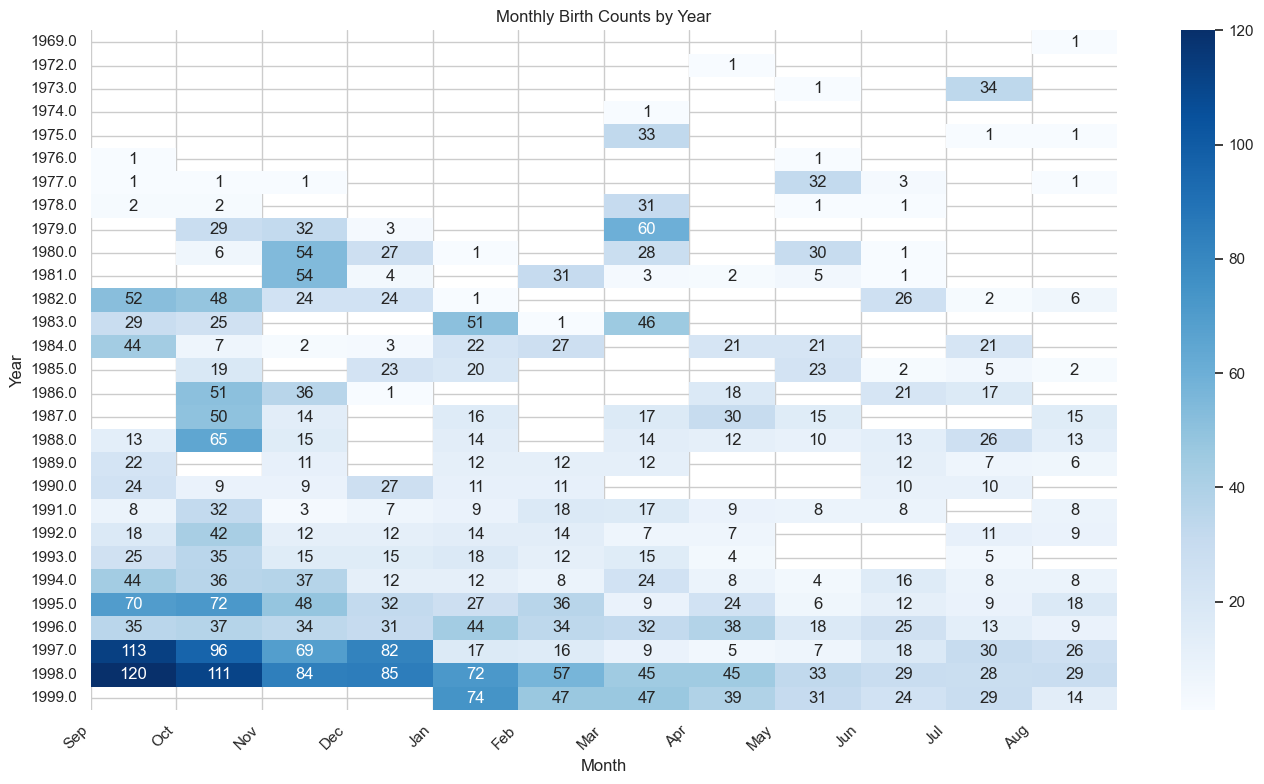

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unstack the grouped data to create a matrix with 'birth_year' as rows and 'birth_month' as columns
monthly_counts_matrix = monthly_counts_by_year.unstack(level=1)

# Reorder the columns to start with September
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
monthly_counts_matrix = monthly_counts_matrix[month_order]

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_counts_matrix, cmap='Blues', annot=True, fmt='g')

# Customize the x-axis labels to show month names in the new order
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45, ha='right')

plt.title('Monthly Birth Counts by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/591024490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_month_by_tier.index, y=common_month_by_tier, palette='viridis')


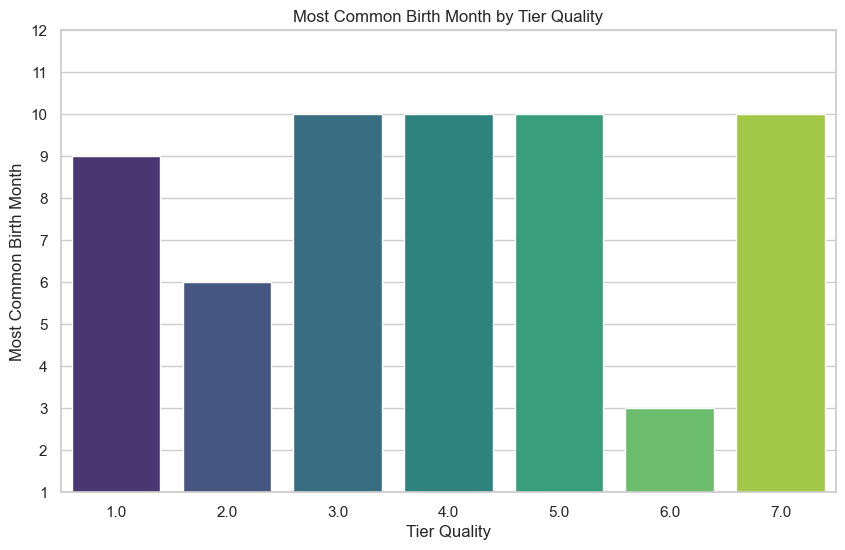

In [81]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=common_month_by_tier.index, y=common_month_by_tier, palette='viridis')

# Set the y-axis to cover all months (1 to 12)
plt.ylim(1, 12)

# Set the y-ticks to include every month
plt.yticks(ticks=range(1, 13), labels=range(1, 13))

# Set titles and labels
plt.title('Most Common Birth Month by Tier Quality')
plt.xlabel('Tier Quality')
plt.ylabel('Most Common Birth Month')

# Show the plot
plt.show()


/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/2421142740.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='birth_month', y='tier_quality', data=average_tier_by_month, palette='viridis')


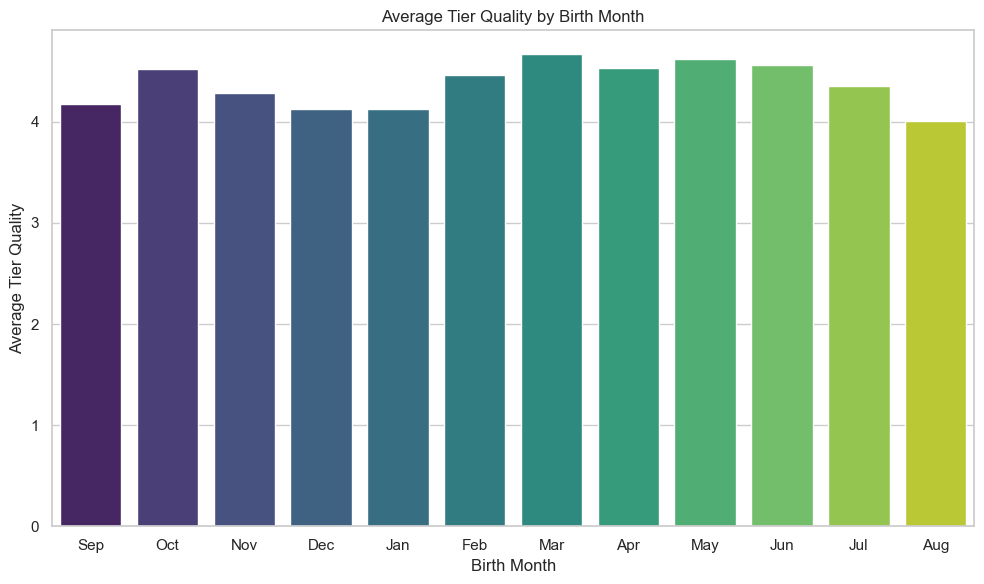

In [82]:

# Convert 'date_of_birth' to datetime and extract 'birth_month'
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], dayfirst=True, errors='coerce')
df['birth_month'] = df['date_of_birth'].dt.month

# Calculate the average tier quality by birth month
average_tier_by_month = df.groupby('birth_month')['tier_quality'].mean().reset_index()

# Reorder the months to start with September
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

# Reindex to follow the custom order
average_tier_by_month['birth_month'] = pd.Categorical(average_tier_by_month['birth_month'], 
                                                      categories=month_order, 
                                                      ordered=True)
average_tier_by_month = average_tier_by_month.sort_values('birth_month')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='birth_month', y='tier_quality', data=average_tier_by_month, palette='viridis')

# Set the custom x-axis labels to reflect the reordered months
plt.xticks(ticks=range(len(month_labels)), labels=month_labels)

# Set titles and labels
plt.title('Average Tier Quality by Birth Month')
plt.xlabel('Birth Month')
plt.ylabel('Average Tier Quality')

# Show the plot
plt.tight_layout()
plt.show()


In [83]:
# Define a custom aggregation function
def top_three_common_months(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Position' and apply the custom function
top_three_months_by_position = df.groupby('position')['birth_month'].agg(top_three_common_months)

print(top_three_months_by_position)


position
AM (C)                         [10.0, 1.0, 11.0]
AM (C), ST (C)                 [10.0, 9.0, 12.0]
AM (L)                          [9.0, 11.0, 1.0]
AM (L), ST (C)                  [9.0, 10.0, 4.0]
AM (LC)                         [11.0, 1.0, 7.0]
AM (LC), ST (C)                 [6.0, 7.0, 10.0]
AM (R)                          [11.0, 1.0, 3.0]
AM (R), ST (C)                  [10.0, 9.0, 1.0]
AM (RC)                         [5.0, 9.0, 11.0]
AM (RC), ST (C)                 [10.0, 2.0, 1.0]
AM (RL)                         [3.0, 10.0, 9.0]
AM (RL), ST (C)                 [9.0, 11.0, 3.0]
AM (RLC)                        [10.0, 8.0, 1.0]
AM (RLC), ST (C)               [11.0, 10.0, 9.0]
D (C)                          [10.0, 9.0, 11.0]
D (C), DM                      [2.0, 12.0, 10.0]
D (C), DM, M (C)                [10.0, 5.0, 9.0]
D (C), DM, M (C), ST (C)                   [3.0]
D (C), ST (C)                             [12.0]
D (L)                          [10.0, 11.0, 3.0]
D (L), AM (

In [84]:
# Define a custom aggregation function
def top_three_common_positions(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Birth Month' and apply the custom function
top_three_positions_by_month = df.groupby('birth_month')['position'].agg(top_three_common_positions)

# Convert the result to a DataFrame for easier manipulation
top_three_positions_by_month_df = top_three_positions_by_month.reset_index()

# Define the desired order of months
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Set 'Birth Month' as a categorical type with the specified order
top_three_positions_by_month_df['birth_month'] = pd.Categorical(
    top_three_positions_by_month_df['birth_month'], 
    categories=month_order, 
    ordered=True
)

# Sort the DataFrame by 'Birth Month'
top_three_positions_by_month_df = top_three_positions_by_month_df.sort_values('birth_month')

# Print the sorted DataFrame
print(top_three_positions_by_month_df)

   birth_month                position
8            9  [ST (C), D (C), M (C)]
9           10  [D (C), ST (C), M (C)]
10          11  [ST (C), D (C), M (C)]
11          12  [M (C), ST (C), D (C)]
0            1  [M (C), ST (C), D (C)]
1            2  [ST (C), D (C), M (C)]
2            3     [ST (C), D (C), GK]
3            4  [ST (C), M (C), D (C)]
4            5     [ST (C), GK, M (C)]
5            6      [D (C), M (C), GK]
6            7     [ST (C), D (C), GK]
7            8  [M (C), ST (C), D (C)]


In [85]:
def top_three_common_months(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Group' and apply the custom function
top_three_months_by_group = df.groupby('group')['birth_month'].agg(top_three_common_months)

# Convert the result to a DataFrame for easier manipulation
top_three_months_by_group_df = top_three_months_by_group.reset_index()

# Print the sorted DataFrame
print(top_three_months_by_group_df)


        group        birth_month
0    Defender  [10.0, 9.0, 11.0]
1     Forward  [10.0, 9.0, 11.0]
2  Goalkeeper  [10.0, 9.0, 11.0]
3  Midfielder  [10.0, 9.0, 11.0]


In [86]:
# Define a custom aggregation function
def top_three_common_quarters(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Group' and apply the custom function
top_three_quarters_by_group = df.groupby('group')['birth_quarter'].agg(top_three_common_quarters)

# Convert the result to a DataFrame for easier manipulation
top_three_quarters_by_group_df = top_three_quarters_by_group.reset_index()

# Print the result
print(top_three_quarters_by_group_df)


        group    birth_quarter
0    Defender  [1.0, 2.0, 3.0]
1     Forward  [1.0, 2.0, 3.0]
2  Goalkeeper  [1.0, 2.0, 3.0]
3  Midfielder  [1.0, 2.0, 3.0]


In [87]:
from math import log10, floor

# Group by 'Birth Month' and 'Group', then calculate the average weight and height
average_stats_by_month_position = df.groupby(['birth_month', 'group']).agg(
    avg_weight=('weight_(kg)', 'mean'),
    avg_height=('height_(cm)', 'mean')
).reset_index()

# Define the desired order of months
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Set 'Birth Month' as a categorical type with the specified order
average_stats_by_month_position['birth_month'] = pd.Categorical(
    average_stats_by_month_position['birth_month'], 
    categories=month_order, 
    ordered=True
)

# Sort the DataFrame by 'Birth Month' and 'Group'
average_stats_by_month_position = average_stats_by_month_position.sort_values(['birth_month', 'group'])

# Round the average weight and height to 1 significant figure
average_stats_by_month_position['avg_weight'] = average_stats_by_month_position['avg_weight'].apply(lambda x: round(x, 1 - int(floor(log10(abs(x))))))
average_stats_by_month_position['avg_height'] = average_stats_by_month_position['avg_height'].apply(lambda x: round(x, 1 - int(floor(log10(abs(x))))))

# Print the sorted and formatted DataFrame
print(average_stats_by_month_position)


   birth_month       group  avg_weight  avg_height
32           9    Defender        74.0       180.0
33           9     Forward        72.0       180.0
34           9  Goalkeeper        78.0       190.0
35           9  Midfielder        71.0       180.0
36          10    Defender        74.0       180.0
37          10     Forward        73.0       180.0
38          10  Goalkeeper        78.0       190.0
39          10  Midfielder        72.0       180.0
40          11    Defender        74.0       180.0
41          11     Forward        73.0       180.0
42          11  Goalkeeper        78.0       190.0
43          11  Midfielder        71.0       180.0
44          12    Defender        74.0       180.0
45          12     Forward        73.0       180.0
46          12  Goalkeeper        80.0       190.0
47          12  Midfielder        71.0       180.0
0            1    Defender        74.0       180.0
1            1     Forward        72.0       180.0
2            1  Goalkeeper     

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/1457962535.py:32: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(


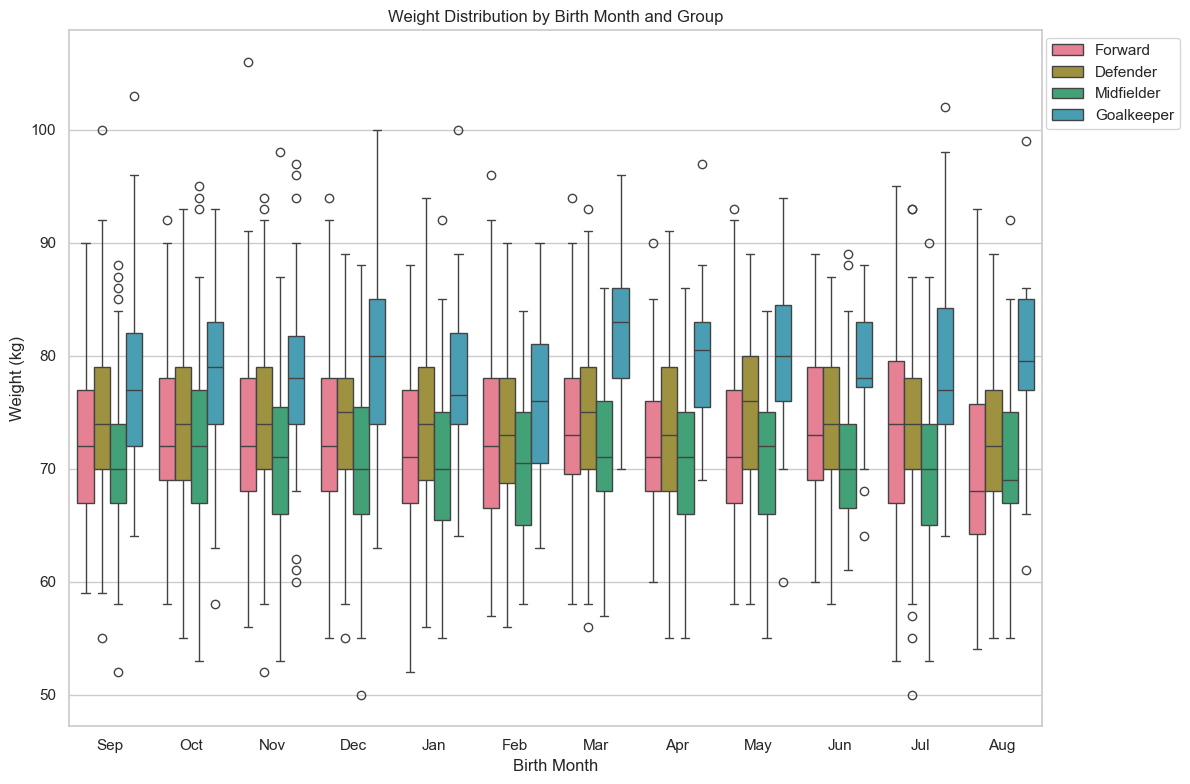

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/1457962535.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(


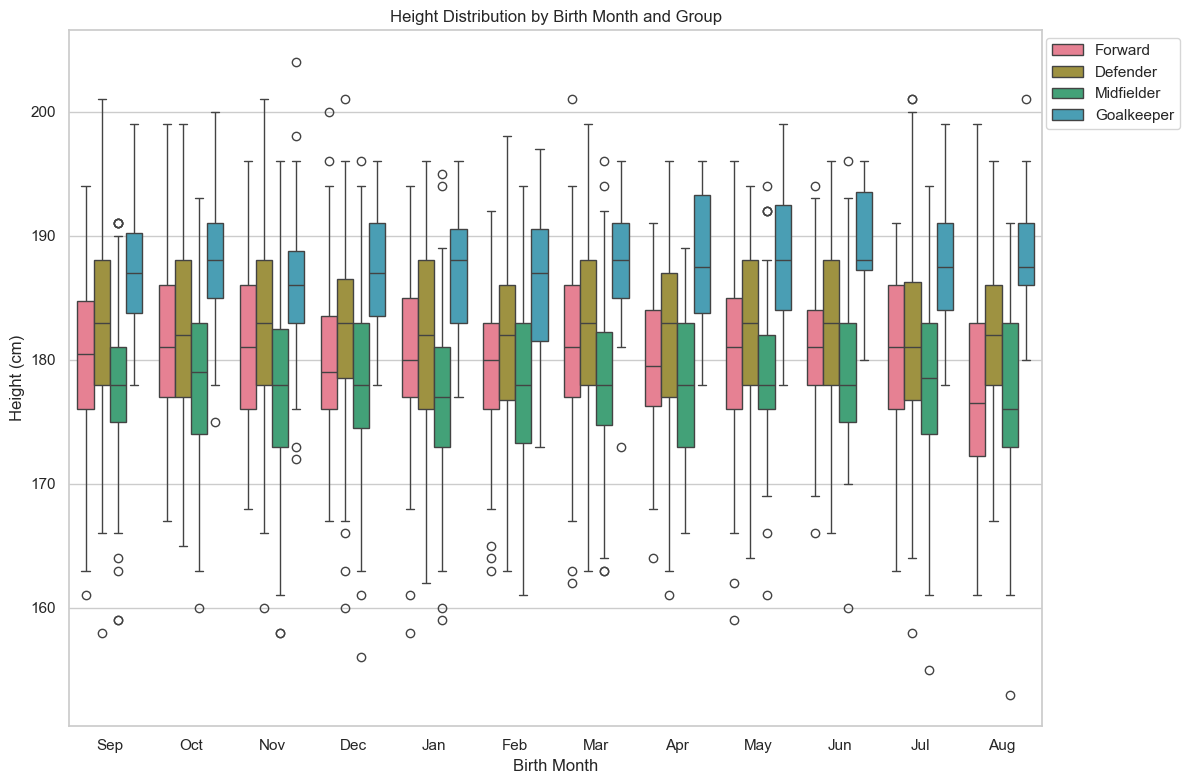

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a dataframe
file_path = '../Datasets/dataset_2016.csv'  
data = pd.read_csv(file_path)

# Convert 'date_of_birth' to datetime (assuming this column exists in the dataset)
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])

# Extract the month from 'date_of_birth' to create 'birth_month'
data['birth_month'] = data['date_of_birth'].dt.month

# Ensure 'birth_month' is treated as a categorical variable with the specified order
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

data['birth_month'] = pd.Categorical(
    data['birth_month'],
    categories=month_order,
    ordered=True
)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the box plot for weight distribution
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(data['group'].unique()))

sns.boxplot(
    data=data,
    x='birth_month',
    y='weight_(kg)',
    hue='group',
    palette=palette
)
plt.title('Weight Distribution by Birth Month and Group')
plt.ylabel('Weight (kg)')
plt.xlabel('Birth Month')
plt.xticks(range(len(month_labels)), month_labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Create the box plot for height distribution
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(data['group'].unique()))

sns.boxplot(
    data=data,
    x='birth_month',
    y='height_(cm)',
    hue='group',
    palette=palette
)
plt.title('Height Distribution by Birth Month and Group')
plt.ylabel('Height (cm)')
plt.xlabel('Birth Month')
plt.xticks(range(len(month_labels)), month_labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


In [89]:
# Read the CSV file into a dataframe
file_path = '../Datasets/dataset_2016.csv'  
df = pd.read_csv(file_path)

# Convert 'date_of_birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

# Drop rows with NaN values in 'date_of_birth' after conversion
df = df.dropna(subset=['date_of_birth'])

# Extract month from 'date_of_birth'
df['Month of Birth'] = df['date_of_birth'].dt.month

# Define custom month order
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Apply custom month order
df['Month of Birth'] = pd.Categorical(df['Month of Birth'], categories=month_order, ordered=True)

# Group by 'second_nationality' and 'Month of Birth', then calculate the average 'tier_quality'
average_tier_quality = df.groupby(['second_nationality', 'Month of Birth'])['tier_quality'].mean().reset_index()

# Drop rows with NaN values in the grouped result
average_tier_quality = average_tier_quality.dropna()

# Round the average 'tier_quality' to one significant figure
average_tier_quality['tier_quality'] = average_tier_quality['tier_quality'].round(1)

# Sort by 'second_nationality' and custom 'Month of Birth' order
average_tier_quality_sorted = average_tier_quality.sort_values(by=['second_nationality', 'Month of Birth'])

print(average_tier_quality_sorted)


    second_nationality Month of Birth  tier_quality
3                  ALB             12           7.0
4                  ALB              1           3.0
5                  ALB              2           3.0
6                  ALB              3           4.0
14                 ANG             11           3.0
24                 ASA              9           5.0
37                 ATG             10           3.0
39                 ATG             12           1.0
42                 ATG              3           4.0
44                 ATG              5           3.0
50                 AUS             11           7.0
54                 AUS              3           7.0
64                 AUT              1           3.0
78                 BDI              3           4.0
81                 BDI              6           1.0
86                 BEL             11           5.0
96                 BRB              9           1.0
98                 BRB             11           3.7
99          

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/1506718678.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tier_quality = df.groupby(['second_nationality', 'Month of Birth'])['tier_quality'].mean().reset_index()


In [90]:
# Read the CSV file into a dataframe
file_path = '../Datasets/dataset_2016.csv'  
df = pd.read_csv(file_path)

# Convert 'date_of_birth' to datetime with dayfirst=True
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], dayfirst=True, errors='coerce')

# Drop rows with NaN values in 'date_of_birth' after conversion
df = df.dropna(subset=['date_of_birth'])

# Extract month from 'date_of_birth'
df['Month of Birth'] = df['date_of_birth'].dt.month

# Define custom month order
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Apply custom month order
df['Month of Birth'] = pd.Categorical(df['Month of Birth'], categories=month_order, ordered=True)

# Group by 'second_nationality' and 'Month of Birth', then calculate the average 'tier_quality'
average_tier_quality = df.groupby(['second_nationality', 'Month of Birth'], observed=True)['tier_quality'].mean().reset_index()

# Drop rows with NaN values in the grouped result
average_tier_quality = average_tier_quality.dropna()

# Round the average 'tier_quality' to one significant figure
average_tier_quality['tier_quality'] = average_tier_quality['tier_quality'].round(1)

# Sort by 'tier_quality' ascending, then by 'second_nationality' and 'Month of Birth'
average_tier_quality_sorted = average_tier_quality.sort_values(by=['tier_quality', 'second_nationality', 'Month of Birth'])

print(average_tier_quality_sorted)


    second_nationality Month of Birth  tier_quality
7                  ATG             12           1.0
14                 BDI              6           1.0
16                 BRB              9           1.0
18                 BRB             12           1.0
24                 CHN              6           1.0
26                 CIV             11           1.0
33                 COD              1           1.0
35                 COD              3           1.0
45                 ESP              9           1.0
50                 FIN              6           1.0
52                 FRA              9           1.0
54                 FRA             11           1.0
55                 FRA              2           1.0
58                 GAM              2           1.0
61                 GER             12           1.0
69                 GHA              2           1.0
74                 GHA              8           1.0
75                 GRE             10           1.0
76          

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/2421067955.py:6: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], dayfirst=True, errors='coerce')


In [91]:
# Convert 'date_of_birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Extract the month from 'date_of_birth' to create 'birth_month'
df['birth_month'] = df['date_of_birth'].dt.month

# Define a custom aggregation function to return the first mode or NaN if empty
def get_first_mode(series):
    modes = series.mode()
    if len(modes) > 0:
        return modes[0]
    else:
        return pd.NA

# Find the most common 'birth_month' for each 'second_nationality', returning only the first mode or NaN
most_common_month = df.groupby('second_nationality')['birth_month'].agg(get_first_mode).reset_index()

# Ensure average_tier_quality has unique 'second_nationality' and round to 1 decimal place
average_tier_quality_unique = average_tier_quality.groupby('second_nationality').agg({
    'tier_quality': 'mean'  # or use another aggregation function as needed
}).reset_index()

average_tier_quality_unique['tier_quality'] = average_tier_quality_unique['tier_quality'].round(1)

# Compute the count of second nationalities
second_nationality_count = df['second_nationality'].value_counts().reset_index()
second_nationality_count.columns = ['second_nationality', 'Count']

# Merge the two DataFrames on 'second_nationality'
result_table = pd.merge(average_tier_quality_unique, most_common_month, on='second_nationality')
result_table = pd.merge(result_table, second_nationality_count, on='second_nationality')

# Rename columns for clarity
result_table.columns = ['2nd Nationality', 'Average Tier Quality', 'Most Common Birth Month', 'Count']

# Sort the table by the count column in descending order
result_table = result_table.sort_values(by='Count', ascending=False)

# Adjust pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(result_table)

# Save DataFrame to CSV file
result_table.to_csv('2nd_nationality_info_table.csv', index=False)

print("Table saved as 2nd_nationality_info_table.csv. Open this file in a spreadsheet application to view the entire table.")


   2nd Nationality  Average Tier Quality  Most Common Birth Month  Count
48             NGA                   3.3                       10     86
37             JAM                   3.3                       10     68
32             IRL                   3.2                       10     51
58             SCO                   4.6                        3     37
72             WAL                   4.8                       10     32
25             GHA                   3.4                        9     32
14             COD                   3.1                       11     19
70             USA                   4.8                        1     16
31             IND                   4.3                        1     13
63             SLE                   2.9                        1     12
36             ITA                   3.9                        2     11
49             NIR                   3.4                        2     10
54             POL                   3.8           

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/2921009052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='2nd Nationality', y='Average Tier Quality', data=result_table, palette='viridis')


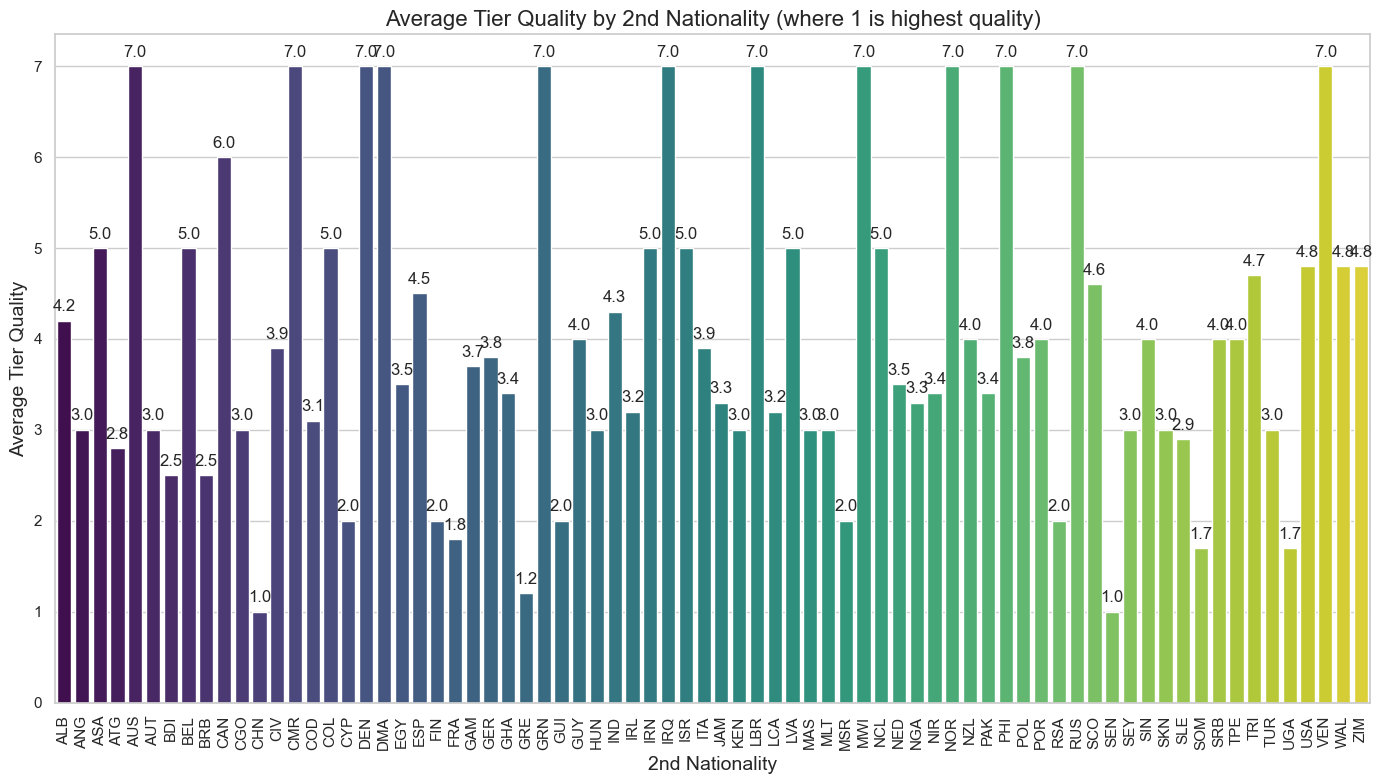

In [97]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create the bar plot
barplot = sns.barplot(x='2nd Nationality', y='Average Tier Quality', data=result_table, palette='viridis')

# Set plot title and labels
plt.title('Average Tier Quality by 2nd Nationality (where 1 is highest quality)', fontsize=16)
plt.xlabel('2nd Nationality', fontsize=14)
plt.ylabel('Average Tier Quality', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add the average tier quality value on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()


Index(['name', 'position', 'group', 'club', 'division', 'based_in',
       'division_tier', 'tier_quality', 'date_of_birth', 'month_of_birth',
       'birth_quarter', 'age_(days)_on_1_july_2015',
       'age_(months)_on_1_july_2015', 'age_(years)_on_1_july_2015',
       'birth_city', 'nation_of_birth', 'birth_region', 'nationality',
       'second_nationality', 'height_(ft_in)', 'height_(ft)', 'height_(in)',
       'height_(cm)', 'weight_(kg)', 'goals', 'appearances', 'is_top_4_tier',
       'train_or_test', 'Month of Birth', 'birth_month'],
      dtype='object')
   2nd Nationality  Average Tier Quality  Most Common Birth Month
0              ALB                   4.2                        1
1              ANG                   3.0                       11
2              ASA                   5.0                        9
3              ATG                   2.8                        3
4              AUS                   7.0                        3
5              AUT                

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_68968/174355956.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = result_table.pivot_table(index="2nd Nationality", columns="Most Common Birth Month", values="Average Tier Quality")


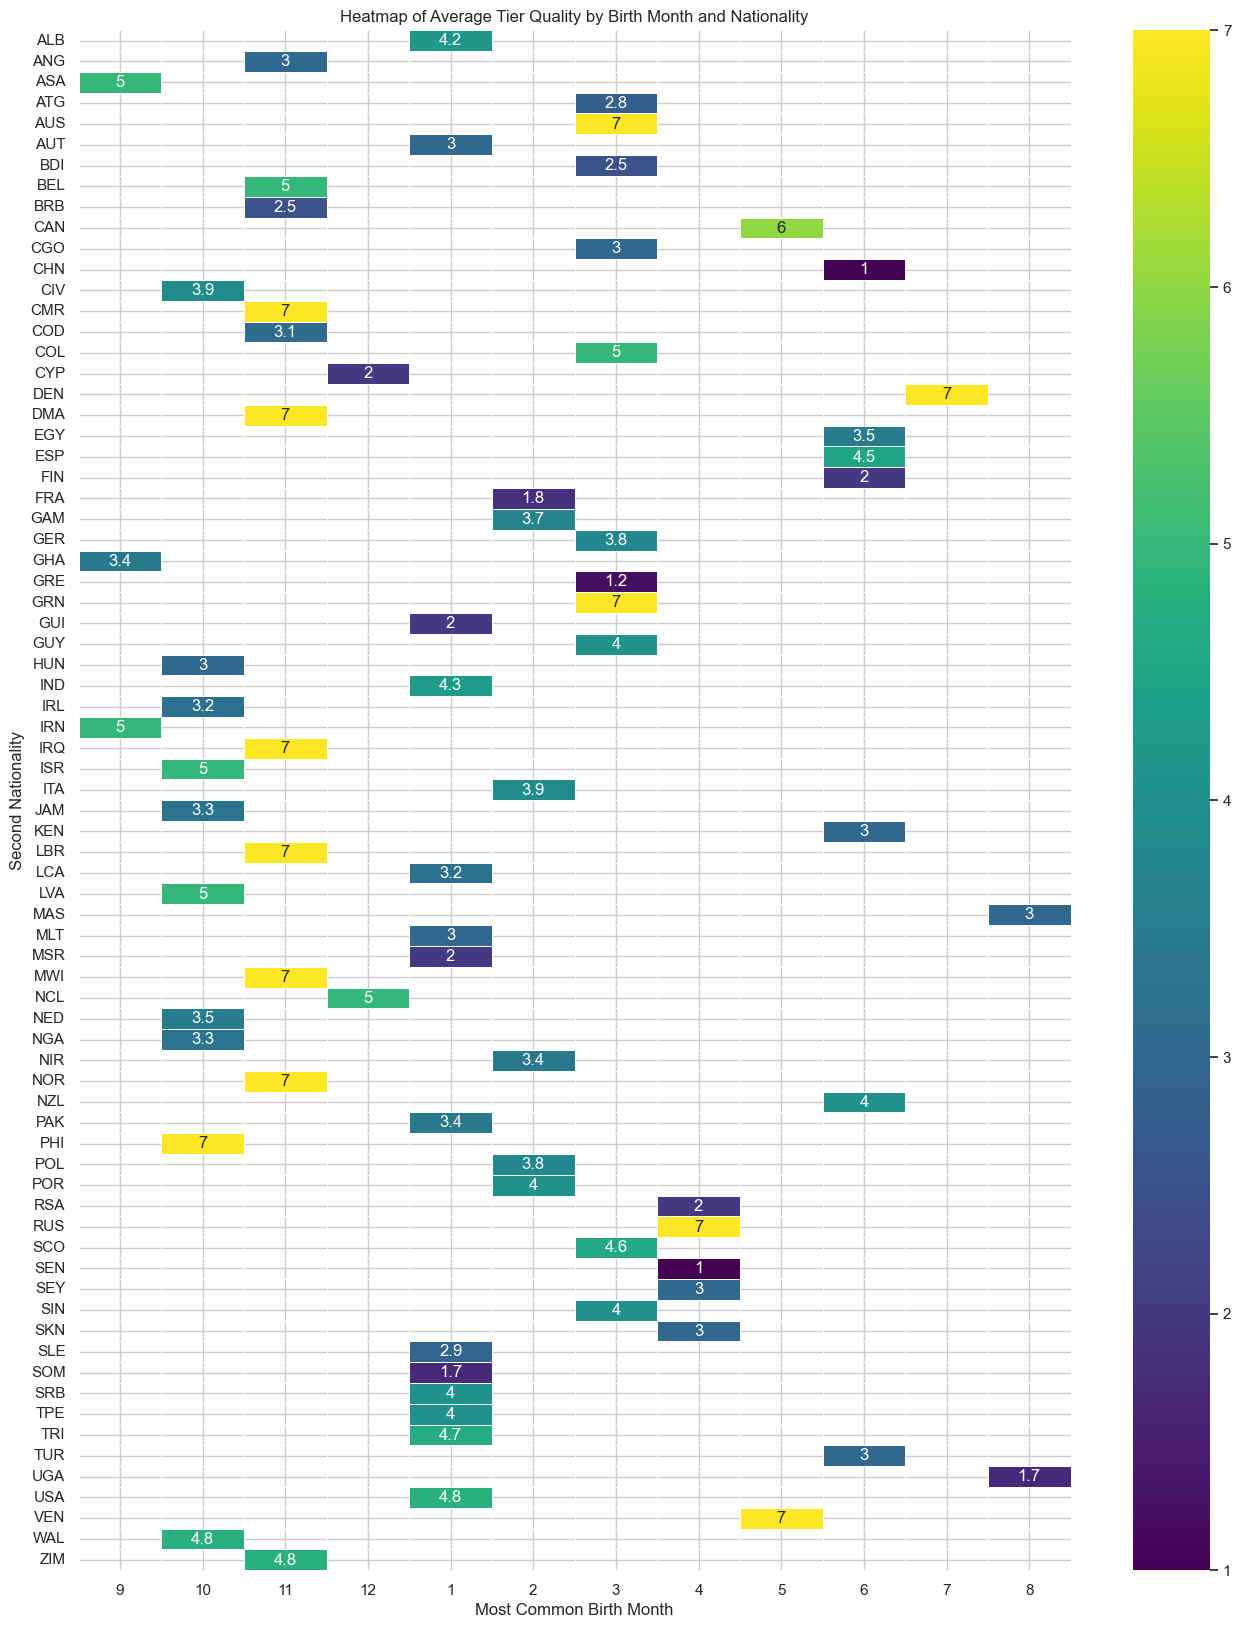

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom aggregation function to return the first mode or NaN if empty
def get_first_mode(series):
    modes = series.mode()
    if len(modes) > 0:
        return modes[0]
    else:
        return pd.NA

# Assuming df and average_tier_quality are already defined
# Print the columns of df to check if 'second_nationality' and 'birth_month' exist
print(df.columns)

# Find the most common 'birth_month' for each 'second_nationality', returning only the first mode or NaN
most_common_month = df.groupby('second_nationality')['birth_month'].agg(get_first_mode).reset_index()

# Ensure average_tier_quality has unique 'second_nationality' and round to 1 decimal place
average_tier_quality_unique = average_tier_quality.groupby('second_nationality').agg({
    'tier_quality': 'mean'  # or use another aggregation function as needed
}).reset_index()

average_tier_quality_unique['tier_quality'] = average_tier_quality_unique['tier_quality'].round(1)

# Merge the two DataFrames on 'second_nationality'
result_table = pd.merge(average_tier_quality_unique, most_common_month, on='second_nationality')

# Drop the unnecessary 'birth_month_x' column if it exists
if 'birth_month_x' in result_table.columns:
    result_table = result_table.drop(columns=['birth_month_x'])

# Rename columns for clarity
result_table.columns = ['2nd Nationality', 'Average Tier Quality', 'Most Common Birth Month']

# Adjust pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(result_table)

# Save DataFrame to CSV file
result_table.to_csv('2nd_nationality_info_table.csv', index=False)

# Print message to open the file
print("Table saved as 2nd_nationality_info_table.csv. Open this file in a spreadsheet application to view the entire table.")

# Set the order of the months
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
result_table['Most Common Birth Month'] = pd.Categorical(result_table['Most Common Birth Month'], categories=month_order, ordered=True)

# Create the heatmap
pivot_table = result_table.pivot_table(index="2nd Nationality", columns="Most Common Birth Month", values="Average Tier Quality")

plt.figure(figsize=(16, 20))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=.5)

# Add title and labels
plt.title('Heatmap of Average Tier Quality by Birth Month and Nationality')
plt.xlabel('Most Common Birth Month')
plt.ylabel('Second Nationality')

# Show the plot
plt.show()
